In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

Mounting google drive and making sure that our class implementation is added to the python intrepreter path

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# import sys
# # import os

# # Get the current working directory
# # current_directory = os.getcwd()

# # Add the current directory to Python's search path
# sys.path.append("/content/drive/MyDrive/Colab Notebooks")

In [3]:
df = pd.read_csv("E:/Minor_Project/fake reviews dataset.csv")
df = df.sample(frac=0.2, random_state=42)

In [4]:
df.head()

,category,rating,label,text_
27957,Kindle_Store_5,3.0,CG,Eva is on her to find a way to escape her abus...
39755,Clothing_Shoes_and_Jewelry_5,5.0,CG,This is my second Glamorise and I love the loo...
24983,Kindle_Store_5,4.0,OR,I absolutely love this series. The Ravens are ...
13985,Movies_and_TV_5,5.0,CG,Probably best movie Rutger Howerton has made. ...
39275,Clothing_Shoes_and_Jewelry_5,5.0,OR,Unfortunately the black didn't work for a lot ...


In [5]:
print(df['category'].unique())

['Kindle_Store_5' 'Clothing_Shoes_and_Jewelry_5' 'Movies_and_TV_5'
 'Sports_and_Outdoors_5' 'Tools_and_Home_Improvement_5' 'Books_5'
 'Toys_and_Games_5' 'Pet_Supplies_5' 'Home_and_Kitchen_5' 'Electronics_5']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8086 entries, 27957 to 33988
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  8086 non-null   object 
 1   rating    8086 non-null   float64
 2   label     8086 non-null   object 
 3   text_     8086 non-null   object 
dtypes: float64(1), object(3)
memory usage: 315.9+ KB


In [7]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [8]:
df['rating'].value_counts()

rating
5.0    4900
4.0    1614
3.0     788
1.0     415
2.0     369
Name: count, dtype: int64

In [9]:
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
# plt.pie(values ,labels=labels, explode=(0.1,0,0,0,0), shadow=True,autopct='%1.1f%%')
# plt.show()
print(labels)
print(values)

Index([5.0, 4.0, 3.0, 1.0, 2.0], dtype='float64', name='rating')
[4900 1614  788  415  369]


In [10]:
# Converting into LOWER_CASE
df['new_text'] = df['text_'].str.lower()
df.head()

,category,rating,label,text_,new_text
27957,Kindle_Store_5,3.0,CG,Eva is on her to find a way to escape her abus...,eva is on her to find a way to escape her abus...
39755,Clothing_Shoes_and_Jewelry_5,5.0,CG,This is my second Glamorise and I love the loo...,this is my second glamorise and i love the loo...
24983,Kindle_Store_5,4.0,OR,I absolutely love this series. The Ravens are ...,i absolutely love this series. the ravens are ...
13985,Movies_and_TV_5,5.0,CG,Probably best movie Rutger Howerton has made. ...,probably best movie rutger howerton has made. ...
39275,Clothing_Shoes_and_Jewelry_5,5.0,OR,Unfortunately the black didn't work for a lot ...,unfortunately the black didn't work for a lot ...


In [11]:
# Remove Puncutation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))
  # The first two arguments ('' and '') are empty strings, meaning there's nothing to replace and nothing to replace with.

In [13]:
df['new_text'] = df['new_text'].apply(lambda X: remove_punctuation(X))

In [14]:
df.head()

,category,rating,label,text_,new_text
27957,Kindle_Store_5,3.0,CG,Eva is on her to find a way to escape her abus...,eva is on her to find a way to escape her abus...
39755,Clothing_Shoes_and_Jewelry_5,5.0,CG,This is my second Glamorise and I love the loo...,this is my second glamorise and i love the loo...
24983,Kindle_Store_5,4.0,OR,I absolutely love this series. The Ravens are ...,i absolutely love this series the ravens are t...
13985,Movies_and_TV_5,5.0,CG,Probably best movie Rutger Howerton has made. ...,probably best movie rutger howerton has made n...
39275,Clothing_Shoes_and_Jewelry_5,5.0,OR,Unfortunately the black didn't work for a lot ...,unfortunately the black didnt work for a lot o...


In [15]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [16]:
# Removing Stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [17]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [18]:
df['new_text'] = df['new_text'].apply(lambda X: remove_stopwords(X))

In [19]:
# Removing of Frequent Words

from collections import Counter
word_count = Counter()

for text in df['new_text']:
  for word in text.split():
    word_count[word] += 1

word_count.most_common(10)

[('great', 3220),
 ('book', 3180),
 ('good', 2957),
 ('one', 2671),
 ('well', 2208),
 ('love', 2175),
 ('would', 2046),
 ('story', 2044),
 ('like', 1965),
 ('read', 1804)]

In [20]:
# Removing of rare Word

RARE_WORDS = set(word for (word,wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'chronological',
 'emphasizes',
 'hyperlinks',
 'omits',
 'pusheen',
 'repeats',
 'respects',
 'smoothed',
 'summaries'}

In [21]:
# Remove Special Character

import re
def remove_special_char(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = re.sub('\s+',' ',text)
  return text

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_14700\1140535980.py:6: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+',' ',text)


In [22]:
df['new_text'] = df['new_text'].apply(lambda X:remove_special_char(X))

In [23]:
# Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [24]:
df['Stemmed_text'] = df['new_text'].apply(lambda X: stem_words(X))

In [25]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
wordnet_map = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])


  df['lemmatized_text'] = df['new_text'].apply(lambda X: lemmatize_words(X))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [27]:
df['lemmatized_text'] = df['new_text'].apply(lambda X: lemmatize_words(X))

In [28]:
df

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text
27957,Kindle_Store_5,3.0,CG,Eva is on her to find a way to escape her abus...,eva find way escape abusive mother meets hands...,eva find way escap abus mother meet handsom st...,eva find way escape abusive mother meet handso...
39755,Clothing_Shoes_and_Jewelry_5,5.0,CG,This is my second Glamorise and I love the loo...,second glamorise love look keep bag wardrobei ...,second glamoris love look keep bag wardrobei b...,second glamorise love look keep bag wardrobei ...
24983,Kindle_Store_5,4.0,OR,I absolutely love this series. The Ravens are ...,absolutely love series ravens hottest protecti...,absolut love seri raven hottest protect forc a...,absolutely love series raven hot protection fo...
13985,Movies_and_TV_5,5.0,CG,Probably best movie Rutger Howerton has made. ...,probably best movie rutger howerton made many ...,probabl best movi rutger howerton made mani pe...,probably best movie rutger howerton make many ...
39275,Clothing_Shoes_and_Jewelry_5,5.0,OR,Unfortunately the black didn't work for a lot ...,unfortunately black didnt work lot dresses wan...,unfortun black didnt work lot dress want love ...,unfortunately black didnt work lot dress want ...
...,...,...,...,...,...,...,...
32569,Books_5,4.0,OR,I enjoyed this book. The author has a strong ...,enjoyed book author strong voice book much les...,enjoy book author strong voic book much less o...,enjoy book author strong voice book much less ...
21138,Pet_Supplies_5,5.0,CG,"Love, Love, Love!!! Gives my puppy the peace ...",love love love gives puppy peace mind able go ...,love love love give puppi peac mind abl go out...,love love love give puppy peace mind able go o...
4638,Sports_and_Outdoors_5,5.0,OR,"What can you say? It's 25 pounds, has a decent...",say 25 pounds decent sized grip last forever,say 25 pound decent size grip last forev,say 25 pound decent size grip last forever
32797,Toys_and_Games_5,5.0,CG,Got it to keep jewelry safe. The pieces are st...,got keep jewelry safe pieces sturdy easy kids ...,got keep jewelri safe piec sturdi easi kid throw,get keep jewelry safe piece sturdy easy kid throw


In [29]:
df['label'].value_counts()

label
OR    4070
CG    4016
Name: count, dtype: int64

In [30]:
df['length'] = df['text_'].apply(len)

In [31]:
df

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text,length
27957,Kindle_Store_5,3.0,CG,Eva is on her to find a way to escape her abus...,eva find way escape abusive mother meets hands...,eva find way escap abus mother meet handsom st...,eva find way escape abusive mother meet handso...,932
39755,Clothing_Shoes_and_Jewelry_5,5.0,CG,This is my second Glamorise and I love the loo...,second glamorise love look keep bag wardrobei ...,second glamoris love look keep bag wardrobei b...,second glamorise love look keep bag wardrobei ...,370
24983,Kindle_Store_5,4.0,OR,I absolutely love this series. The Ravens are ...,absolutely love series ravens hottest protecti...,absolut love seri raven hottest protect forc a...,absolutely love series raven hot protection fo...,181
13985,Movies_and_TV_5,5.0,CG,Probably best movie Rutger Howerton has made. ...,probably best movie rutger howerton made many ...,probabl best movi rutger howerton made mani pe...,probably best movie rutger howerton make many ...,189
39275,Clothing_Shoes_and_Jewelry_5,5.0,OR,Unfortunately the black didn't work for a lot ...,unfortunately black didnt work lot dresses wan...,unfortun black didnt work lot dress want love ...,unfortunately black didnt work lot dress want ...,300
...,...,...,...,...,...,...,...,...
32569,Books_5,4.0,OR,I enjoyed this book. The author has a strong ...,enjoyed book author strong voice book much les...,enjoy book author strong voic book much less o...,enjoy book author strong voice book much less ...,1552
21138,Pet_Supplies_5,5.0,CG,"Love, Love, Love!!! Gives my puppy the peace ...",love love love gives puppy peace mind able go ...,love love love give puppi peac mind abl go out...,love love love give puppy peace mind able go o...,111
4638,Sports_and_Outdoors_5,5.0,OR,"What can you say? It's 25 pounds, has a decent...",say 25 pounds decent sized grip last forever,say 25 pound decent size grip last forev,say 25 pound decent size grip last forever,83
32797,Toys_and_Games_5,5.0,CG,Got it to keep jewelry safe. The pieces are st...,got keep jewelry safe pieces sturdy easy kids ...,got keep jewelri safe piec sturdi easi kid throw,get keep jewelry safe piece sturdy easy kid throw,85


In [32]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8086 entries, 27957 to 33988
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         8086 non-null   object 
 1   rating           8086 non-null   float64
 2   label            8086 non-null   object 
 3   text_            8086 non-null   object 
 4   new_text         8086 non-null   object 
 5   Stemmed_text     8086 non-null   object 
 6   lemmatized_text  8086 non-null   object 
 7   length           8086 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 568.5+ KB


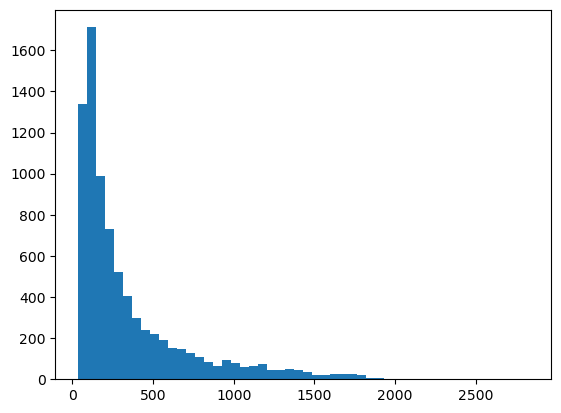

In [34]:
plt.hist(df['length'],bins=50)
plt.show()

In [35]:
df.groupby('label').describe()

rating                                               length  \
        count      mean       std  min  25%  50%  75%  max   count   
label                                                                
CG     4016.0  4.266932  1.124154  1.0  4.0  5.0  5.0  5.0  4016.0   
OR     4070.0  4.259705  1.137455  1.0  4.0  5.0  5.0  5.0  4070.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     304.999751  305.171365  49.0   95.0  178.0  381.0  1717.0  
OR     394.713268  411.129267  34.0  123.0  226.0  502.0  2827.0

In [36]:
df.head()

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text,length
27957,Kindle_Store_5,3.0,CG,Eva is on her to find a way to escape her abus...,eva find way escape abusive mother meets hands...,eva find way escap abus mother meet handsom st...,eva find way escape abusive mother meet handso...,932
39755,Clothing_Shoes_and_Jewelry_5,5.0,CG,This is my second Glamorise and I love the loo...,second glamorise love look keep bag wardrobei ...,second glamoris love look keep bag wardrobei b...,second glamorise love look keep bag wardrobei ...,370
24983,Kindle_Store_5,4.0,OR,I absolutely love this series. The Ravens are ...,absolutely love series ravens hottest protecti...,absolut love seri raven hottest protect forc a...,absolutely love series raven hot protection fo...,181
13985,Movies_and_TV_5,5.0,CG,Probably best movie Rutger Howerton has made. ...,probably best movie rutger howerton made many ...,probabl best movi rutger howerton made mani pe...,probably best movie rutger howerton make many ...,189
39275,Clothing_Shoes_and_Jewelry_5,5.0,OR,Unfortunately the black didn't work for a lot ...,unfortunately black didnt work lot dresses wan...,unfortun black didnt work lot dress want love ...,unfortunately black didnt work lot dress want ...,300


In [37]:
X = df[['rating', 'lemmatized_text']]
y = df['label']


In [38]:
print(X)
print(y)

       rating                                    lemmatized_text
27957     3.0  eva find way escape abusive mother meet handso...
39755     5.0  second glamorise love look keep bag wardrobei ...
24983     4.0  absolutely love series raven hot protection fo...
13985     5.0  probably best movie rutger howerton make many ...
39275     5.0  unfortunately black didnt work lot dress want ...
...       ...                                                ...
32569     4.0  enjoy book author strong voice book much less ...
21138     5.0  love love love give puppy peace mind able go o...
4638      5.0         say 25 pound decent size grip last forever
32797     5.0  get keep jewelry safe piece sturdy easy kid throw
33988     4.0  really dont like blind box never end least one...

[8086 rows x 2 columns]
27957    CG
39755    CG
24983    OR
13985    CG
39275    OR
         ..
32569    OR
21138    CG
4638     OR
32797    CG
33988    OR
Name: label, Length: 8086, dtype: object


In [39]:
df['label'] = df['label'].apply(lambda x: 1 if x == 'OR' else 0)

In [40]:
df.tail()

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text,length
32569,Books_5,4.0,1,I enjoyed this book. The author has a strong ...,enjoyed book author strong voice book much les...,enjoy book author strong voic book much less o...,enjoy book author strong voice book much less ...,1552
21138,Pet_Supplies_5,5.0,0,"Love, Love, Love!!! Gives my puppy the peace ...",love love love gives puppy peace mind able go ...,love love love give puppi peac mind abl go out...,love love love give puppy peace mind able go o...,111
4638,Sports_and_Outdoors_5,5.0,1,"What can you say? It's 25 pounds, has a decent...",say 25 pounds decent sized grip last forever,say 25 pound decent size grip last forev,say 25 pound decent size grip last forever,83
32797,Toys_and_Games_5,5.0,0,Got it to keep jewelry safe. The pieces are st...,got keep jewelry safe pieces sturdy easy kids ...,got keep jewelri safe piec sturdi easi kid throw,get keep jewelry safe piece sturdy easy kid throw,85
33988,Toys_and_Games_5,4.0,1,Really don't like blind boxes because you neve...,really dont like blind boxes never end least o...,realli dont like blind box never end least one...,really dont like blind box never end least one...,120


In [41]:
X = df[['rating', 'lemmatized_text']]
y = df['label']

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:

v = TfidfVectorizer()
X_lemmatized_tfidf = v.fit_transform(X['lemmatized_text'])

In [44]:
# Combine 'rating' and vectorized 'lemmatized_text'
X_combined_tfidf = hstack([X['rating'].values.reshape(-1, 1), X_lemmatized_tfidf])

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2, random_state=1)


Importing implemented class of our algorithm

In [46]:
from RandomForest import RandomForest


In [51]:
# Instantiate the estimator
model = RandomForest()

# Fit the training data to model 
model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.toarray())

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# saving accuracy 
implementedM_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {implementedM_accuracy}")
print(classification_report(y_test, predictions))


Accuracy: 0.7509270704573547
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       813
           1       0.69      0.90      0.78       805

    accuracy                           0.75      1618
   macro avg       0.78      0.75      0.75      1618
weighted avg       0.78      0.75      0.75      1618



Using Standard Library

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the estimator
model = RandomForestClassifier()

# Fit the training data to model 
model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.toarray())

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

stdM_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {stdM_accuracy}")
print(classification_report(y_test, predictions))


Accuracy: 0.8220024721878862
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       813
           1       0.83      0.81      0.82       805

    accuracy                           0.82      1618
   macro avg       0.82      0.82      0.82      1618
weighted avg       0.82      0.82      0.82      1618



**Plotting Accuracy for Standard and Implemented Model**

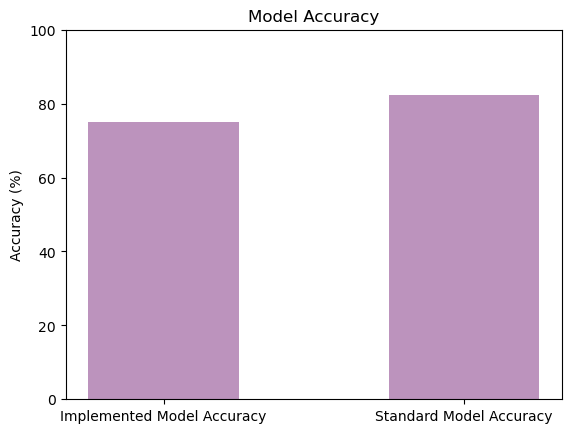

In [53]:

# Convert accuracy to percentage
stdM_accuracy = stdM_accuracy * 100
implementedM_accuracy = implementedM_accuracy * 100


# Create a bar graph
# plt.figure(figsize=(3, 5))
plt.bar(['Implemented Model Accuracy','Standard Model Accuracy'], [implementedM_accuracy,stdM_accuracy], color='#bc93bd',width=0.5)


# Add title and labels
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set limit from 0 to 100 to represent a percentage

# Show the plot
plt.show()
